Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Some advantages of decision trees are:

Decision tree does not require normalization and scaling of data.

Missing value in the data-set also does not affect the process of making the decision tree of the particular dataset.

Itis very easy to explain the decision tree to anyone.

Disadvantages of Decision Tree

A small change in the data-set can result in a large change in the structure ofthe decision tree causing instability in the model.

It requires more time to train a model in decision tree than any other algorithm presents out there.

In a Decision tree calculation can be far more expensive than the other algorithm.

Terminology
Root node-Represent the entire set of the population which gets further divided into sets based on splitting decisions.

Decision node-These are the internalnodes ofthe tree,These nodes are expressed through conditionalexpression for input attributes.

Leaf node- Nodes which do not split further are known as leaf nodes or terminal nodes.

Splitting-The process of dividing a node into one or more sub-nodes.

Pruning- It is the reverse process of splitting where the sub-nodes are removed.


Measures of Impurity: Decision trees recursively split feature about to their target variable’s purity. The algorithm is designed to optimize each split such the purity will be maximized. Impurity can be measured in many ways such as Gini impurity, Entropy and information gain.

### Case Study - Wine Quality Prediction

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

### Dataset:

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

This dataset is also available from the UCI machine learning repository, 

https://archive.ics.uci.edu/ml/datasets/wine+quality

### Problem Statement:

Wine Quality Prediction- Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository. The wine dataset is a classic and very easy multi-class classification dataset.

Number of Instances: red wine - 1599; white wine - 4898.

Attribute information:

Input variables (based on physicochemical tests):

fixed acidity (tartaric acid - g / dm^3)

volatile acidity (acetic acid - g / dm^3)

citric acid (g / dm^3)

residual sugar (g / dm^3)

chlorides (sodium chloride - g / dm^3

free sulfur dioxide (mg / dm^3)

total sulfur dioxide (mg / dm^3)

density (g / cm^3)

pH

sulphates (potassium sulphate - g / dm3)

alcohol (% by volume)

Output variable (based on sensory data):

quality (score between 0 and 10)

Missing Attribute Values: None

### Description of attributes:

1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data): 12 - quality (score between 0 and 10)

### Import all necessary modules and load the data

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
wine=pd.read_csv('1437923016_411__winequality-red.csv', sep=';')

Print 10 samples from the dataset

In [6]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

Print the data type

In [9]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Print the shape of the data

In [11]:
wine.shape

(1599, 12)

Print the descriptive statistics

In [12]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Univariate analysis to check the individual attributes

C:\Users\40100065\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

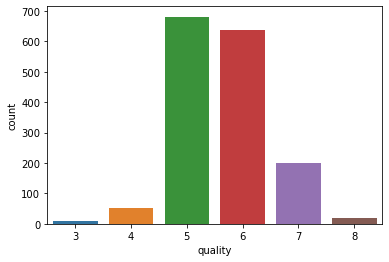

In [13]:
sns.countplot(wine['quality'])

C:\Users\40100065\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

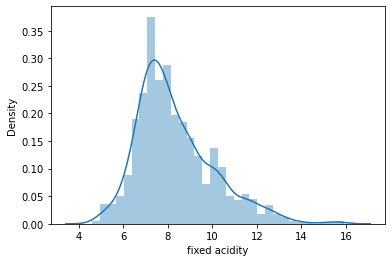

In [14]:
sns.distplot(wine['fixed acidity'])

Use correlation method to observe the relationship between different variables and state your insights

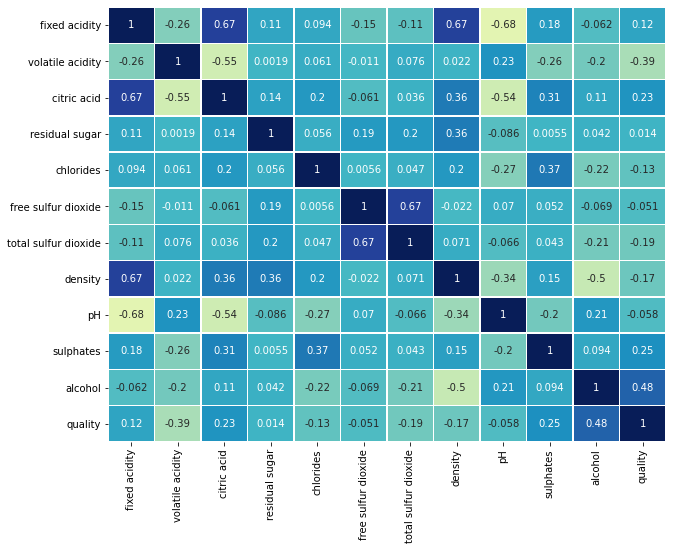

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr(),
           annot=True,
           linewidths=0.5,
           center=0,
           cbar=False,
           cmap="YlGnBu")
plt.show()

Levels of Y variable

In [16]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Combine 7&8, combine 3&4 and 4&5 so that we have only 3 levels and a more balanced Y variable

In [17]:
wine['quality']=wine['quality'].replace(8,7)
wine['quality']=wine['quality'].replace(3,5)
wine['quality']=wine['quality'].replace(4,5)
wine['quality'].value_counts()

5    744
6    638
7    217
Name: quality, dtype: int64

Split the data into training and test data set in the 70:30

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(wine.drop('quality', axis =1), wine['quality'], test_size=.25, random_state=22)
x_train.shape, x_test.shape

((1199, 11), (400, 11))

Create the decision tree model using “entropy” method

In [19]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [22]:
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Print the accuracy of the model and confusion matrix

In [23]:
#Performance on training data
model_entropy.score(x_train, y_train)

1.0

In [25]:
#Performance on test data
model_entropy.score(x_test, y_test)

0.6175

There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting.

Regularise/ Prune the decision tree by limiting the max depth trees and print the accuracy

In [26]:
clf_pruned=DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
clf_pruned.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [41]:
preds_pruned = clf_pruned.predict(x_test)
preds_pruned_train = clf_pruned.predict(x_train)

In [42]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.5975
0.6071726438698916


In [45]:
acc_DT = accuracy_score(y_test, preds_pruned)

When the tree is regularised, overfitting is reduced, but there is no increase in accuracy

In [43]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
alcohol,0.629149
sulphates,0.192173
volatile acidity,0.095558
total sulfur dioxide,0.083121
fixed acidity,0.000000
citric acid,0.000000
residual sugar,0.000000
chlorides,0.000000
free sulfur dioxide,0.000000
density,0.000000


From the feature importance dataframe we can infer that alcohol, sulphate, volatile acidity and total sulfur dioxide are the variables that impact wine quality

In [46]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.5975
